In [3]:
# Import the libraries and modules of the machine learning
# Import all tools we need
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import dtale

 # we want our plots to appear inside the notebook
%matplotlib inline
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from imblearn.over_sampling import SMOTE
# Preprocesing
from sklearn.neighbors import KNeighborsClassifier
from numpy.random import randint
# Model Evaluation 
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score
from sklearn.metrics import plot_roc_curve, recall_score, f1_score, precision_score
from sklearn.linear_model import Lasso, Ridge

In [4]:
df= pd.read_csv("creditcard.csv")


In [5]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [6]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [7]:
columns_to_be_removed = list(df.columns)
temp_list = ["Time", "Amount", "Class"]
for i in temp_list:
    columns_to_be_removed.remove(i)
df.drop(columns_to_be_removed, axis=1, inplace=True)
df.head()

,Time,Amount,Class
0,0.0,149.62,0
1,0.0,2.69,0
2,1.0,378.66,0
3,1.0,123.50,0
4,2.0,69.99,0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   Amount  284807 non-null  float64
 2   Class   284807 non-null  int64  
dtypes: float64(2), int64(1)
memory usage: 6.5 MB


In [9]:
df.isnull().sum()

Time      0
Amount    0
Class     0
dtype: int64

In [10]:
class_count = df['Class'].value_counts()
class_count

0    284315
1       492
Name: Class, dtype: int64

In [11]:
(df.groupby('Class')['Class'].count()/df['Class'].count()) *100


Class
0    99.827251
1     0.172749
Name: Class, dtype: float64

In [12]:
Non_Fraud=class_count[0]/df['Class'].count()*100
print("Non-Fraud Transaction Percentage:", round(Non_Fraud,3))
Fraud=class_count[1]/df['Class'].count()*100
print("Fraud Transaction Percentage:", round(Fraud,3))

Non-Fraud Transaction Percentage: 99.827
Fraud Transaction Percentage: 0.173


findfont: Font family ['Heiti TC'] not found. Falling back to DejaVu Sans.


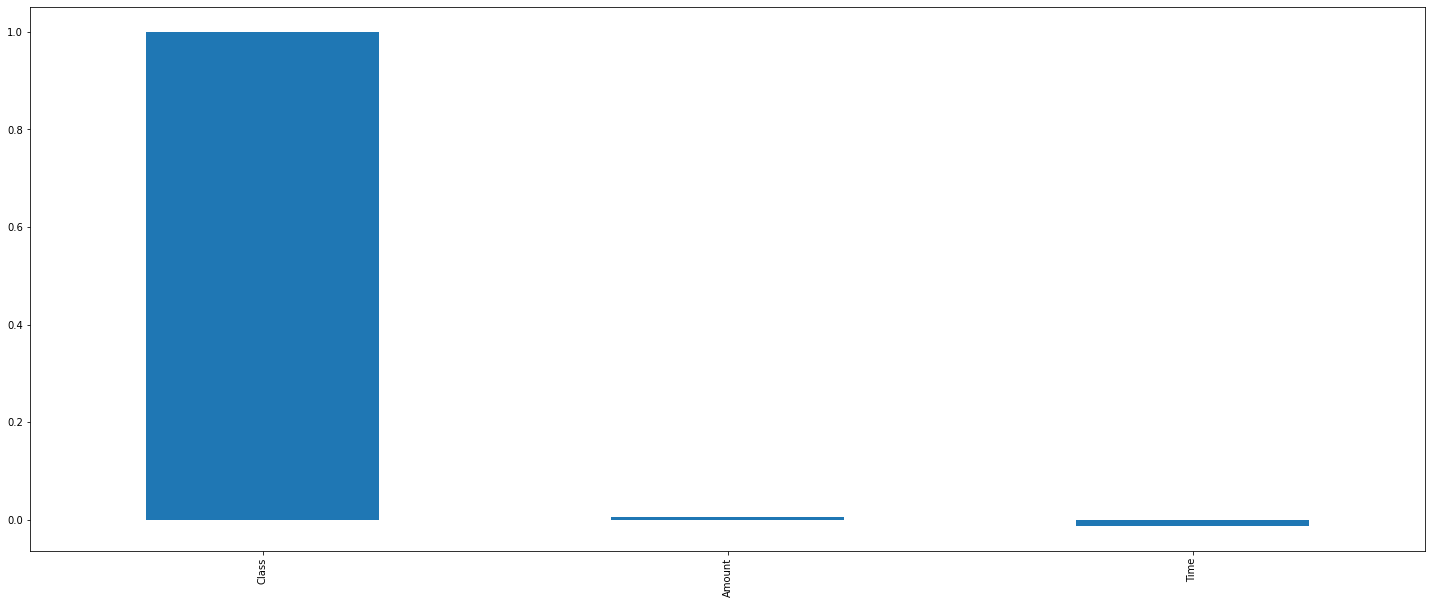

In [13]:
plt.figure(figsize=(25,10))
df.corr()['Class'].sort_values(ascending = False).plot(kind='bar')
plt.show()


In [14]:
dtale.show(df)

2022-04-23 02:29:30,226 - WARNING  - findfont: Font family ['Heiti TC'] not found. Falling back to DejaVu Sans.


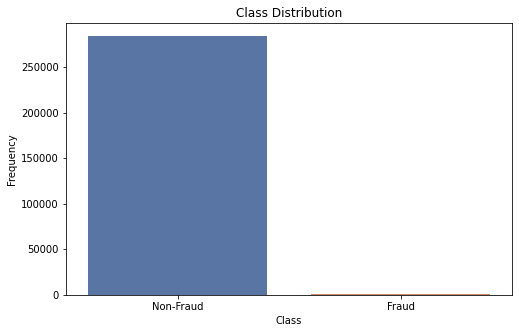

In [15]:
#Plotting the class distribution
plt.figure(figsize=(8,5))
sns.countplot(x = "Class", palette='deep', data = df)
plt.xticks(rotation = 0)
plt.xlabel("Class")
plt.ylabel("Frequency")
plt.title("Class Distribution")
df["Class"].value_counts()
labels = ["Non-Fraud", "Fraud"]
plt.xticks(range(2), labels)
plt.show()

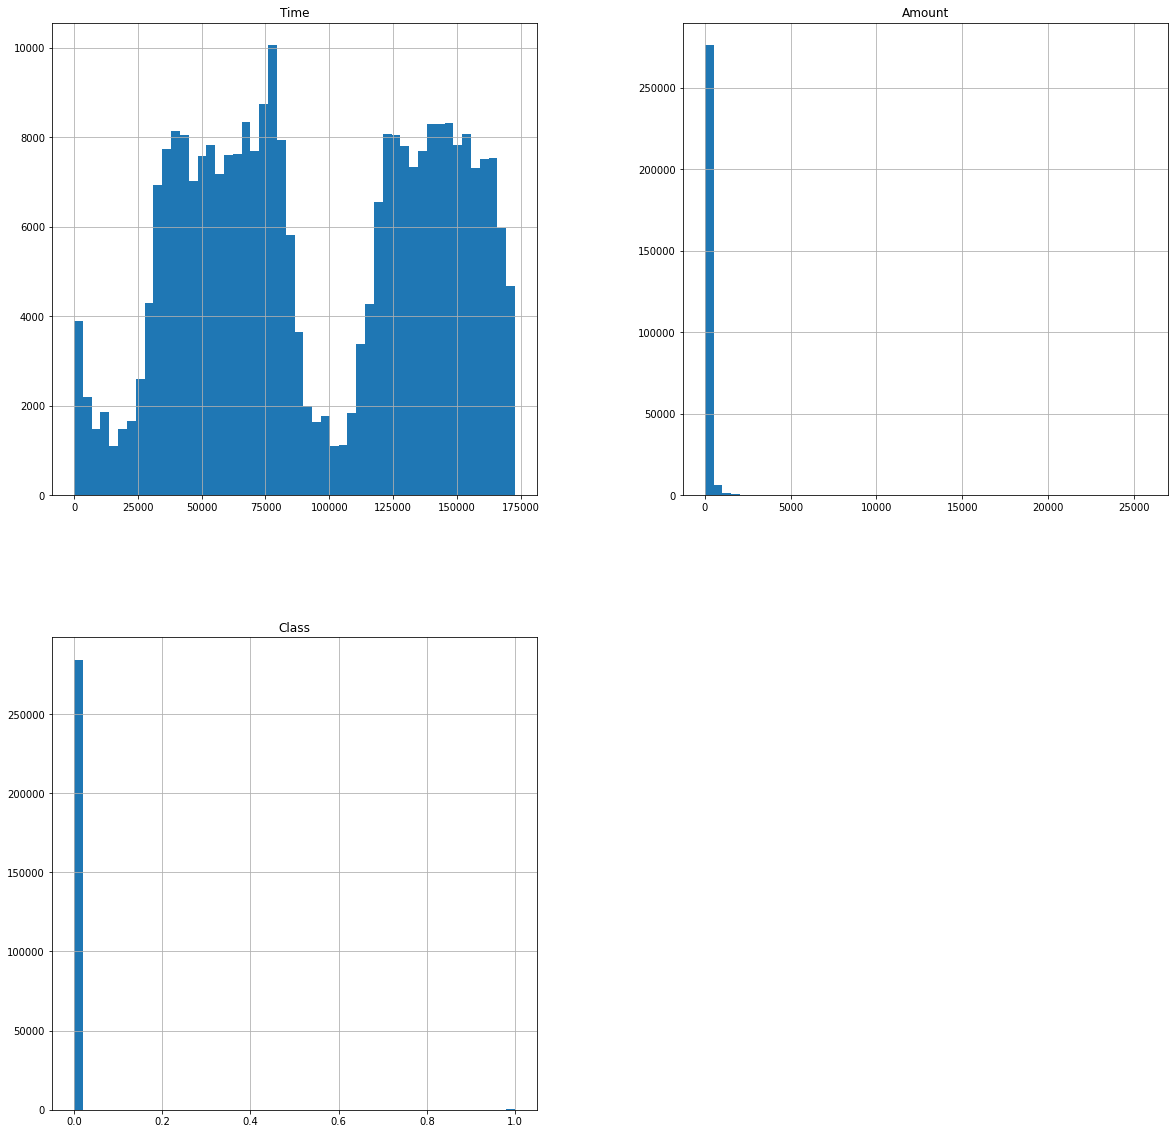

In [16]:
# Univariate Analysis of features
# Plotting histograms
df.hist(bins=50,figsize=(20,20))
plt.show()

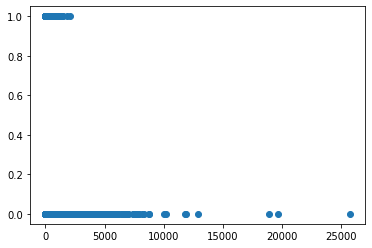

In [56]:
plt.scatter(df.Amount, df.Class)

In [59]:
df.Class.value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [17]:
# separating the data for analysis
legit = df[df.Class == 0]
fraud = df[df.Class == 1]

In [18]:
not_fraud_undersampling = legit.sample(n=492)

In [19]:
df_undersampling = pd.concat([not_fraud_undersampling, fraud], axis=0)

In [20]:
 df_undersampling.shape

(984, 3)

In [21]:
df_undersampling.Class.value_counts()

0    492
1    492
Name: Class, dtype: int64

In [22]:
x_undersampling = df_undersampling.drop("Class", axis=1)
y_undersampling = df_undersampling.Class

In [23]:
print(x_undersampling)

            Time  Amount
36956    38749.0  158.00
39998    40052.0    0.76
206027  136032.0   47.00
150325   93068.0   24.95
222524  143011.0   70.00
...          ...     ...
279863  169142.0  390.00
280143  169347.0    0.76
280149  169351.0   77.89
281144  169966.0  245.00
281674  170348.0   42.53

[984 rows x 2 columns]


In [24]:
print(y_undersampling)

36956     0
39998     0
206027    0
150325    0
222524    0
         ..
279863    1
280143    1
280149    1
281144    1
281674    1
Name: Class, Length: 984, dtype: int64


In [25]:
x_undersampling_train, x_undersampling_test, y_undersampling_train, y_undersampling_test = train_test_split(x_undersampling, y_undersampling, test_size=0.3 , random_state=2)

In [26]:
 y_undersampling_train.value_counts()

0    344
1    344
Name: Class, dtype: int64

In [27]:
print(x_undersampling.shape, x_undersampling_train.shape, x_undersampling_test.shape)

(984, 2) (688, 2) (296, 2)


In [28]:
print(y_undersampling.shape, y_undersampling_train.shape, y_undersampling_test.shape)

(984,) (688,) (296,)


In [29]:
y_undersampling_test.value_counts()

0    148
1    148
Name: Class, dtype: int64

In [30]:
knn=KNeighborsClassifier(n_neighbors=3,metric='minkowski',p=2)
knn=knn.fit(x_undersampling_train,np.ravel(y_undersampling_train))
y_pred=knn.predict(x_undersampling_test)
print("kNearest Neighbour")
print("Accuracy")
print(accuracy_score(y_undersampling_test, y_pred))
print(accuracy_score(y_undersampling_test, y_pred,normalize=False))
print("Confusion matrix")
conf_matrix=confusion_matrix(y_undersampling_test,y_pred)
print(conf_matrix)


kNearest Neighbour
Accuracy
0.6216216216216216
184
Confusion matrix
[[96 52]
 [60 88]]


In [31]:
print(classification_report(y_undersampling_test, y_pred))

              precision    recall  f1-score   support

           0       0.62      0.65      0.63       148
           1       0.63      0.59      0.61       148

    accuracy                           0.62       296
   macro avg       0.62      0.62      0.62       296
weighted avg       0.62      0.62      0.62       296



In [32]:
x1 = recall_score(y_undersampling_test, y_pred)
x2 = f1_score(y_undersampling_test, y_pred)
x3 = precision_score(y_undersampling_test, y_pred)

In [33]:
precision_score(y_undersampling_test, y_pred)

0.6285714285714286

In [34]:
recall_score(y_undersampling_test, y_pred)

0.5945945945945946

In [35]:
graph = pd.DataFrame({"recall":x1,  "f1_score":x2, "precision_score": x3},
             index=[0])

<AxesSubplot:>

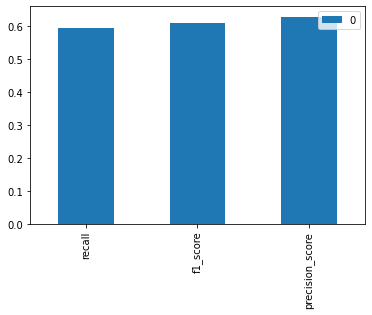

In [36]:
graph.T.plot.bar()

In [37]:
classification_report(y_undersampling_test, y_pred)

'              precision    recall  f1-score   support\n\n           0       0.62      0.65      0.63       148\n           1       0.63      0.59      0.61       148\n\n    accuracy                           0.62       296\n   macro avg       0.62      0.62      0.62       296\nweighted avg       0.62      0.62      0.62       296\n'

In [38]:
not_fraud = legit.sample(n=100000)


In [39]:
df_new = pd.concat([not_fraud, fraud], axis=0)


In [40]:
df_new.shape

(100492, 3)

In [41]:
df_new['Class'].value_counts()

0    100000
1       492
Name: Class, dtype: int64

In [42]:
x = df_new.drop("Class", axis=1)


y = df_new.Class

In [43]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3 , random_state=2)

In [44]:
sm = SMOTE(sampling_strategy=1, random_state=2)
X_train_large, y_train_large = sm.fit_resample(x_train, y_train)
X_train_large.size

279996

In [45]:
knn=KNeighborsClassifier(n_neighbors=3,metric='minkowski',p=2)
knn=knn.fit(X_train_large,y_train_large)
y_pred=knn.predict(x_test)
print("kNearest Neighbour")
print("Accuracy")
print(accuracy_score(y_test, y_pred))
print(accuracy_score(y_test, y_pred,normalize=False))
print("Confusion matrix")
conf_matrix=confusion_matrix(y_test,y_pred)
print(conf_matrix)

kNearest Neighbour
Accuracy
0.8308013798593605
25047
Confusion matrix
[[24978  5023]
 [   78    69]]


In [46]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.83      0.91     30001
           1       0.01      0.47      0.03       147

    accuracy                           0.83     30148
   macro avg       0.51      0.65      0.47     30148
weighted avg       0.99      0.83      0.90     30148



In [48]:
x_train.shape

(70344, 2)

In [49]:
# making the classification functions
models = {"Logistic_Regression": LogisticRegression(),
         "Decision_Tree_classifier":DecisionTreeClassifier(),
         "KNN":KNeighborsClassifier(),
         "RandomForestClassifier":RandomForestClassifier()}
def best_clf(X_train, X_test, y_train, y_test, models):
    score_card = {}
    for model_name, clf in models.items():
        model = clf;
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        score_card[model_name] = model.score(X_test, y_test)
        print(model_name)
        print(classification_report(y_test, y_pred))
        print("---------------------------------------------------------------------------------------------------------")
    return score_card


In [50]:
x1 = recall_score(y_test, y_pred)
x2 = f1_score(y_test, y_pred)
x3 = precision_score(y_test, y_pred)

<AxesSubplot:>

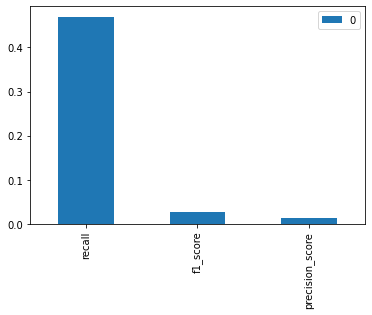

In [52]:
graph = pd.DataFrame({"recall":x1,  "f1_score":x2, "precision_score": x3},
             index=[0])
graph.T.plot.bar()

In [53]:
best_clf(X_train_large, x_test, y_train_large, y_test, models)

Logistic_Regression
              precision    recall  f1-score   support

           0       1.00      0.88      0.93     30001
           1       0.01      0.21      0.02       147

    accuracy                           0.87     30148
   macro avg       0.50      0.54      0.47     30148
weighted avg       0.99      0.87      0.93     30148

---------------------------------------------------------------------------------------------------------
Decision_Tree_classifier
              precision    recall  f1-score   support

           0       1.00      0.90      0.95     30001
           1       0.02      0.43      0.04       147

    accuracy                           0.90     30148
   macro avg       0.51      0.67      0.49     30148
weighted avg       0.99      0.90      0.94     30148

---------------------------------------------------------------------------------------------------------
KNN
              precision    recall  f1-score   support

           0       1.00      0

{'Logistic_Regression': 0.872528857635664,
 'Decision_Tree_classifier': 0.9014528326920526,
 'KNN': 0.8256600769536951,
 'RandomForestClassifier': 0.9033435053734907}